In [433]:
from beakerx.object import beakerx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [436]:
df = pd.read_csv("Data/mnist_train.csv")
y = df.label
x = df.drop("label", axis=1)
x = x.values.reshape(60000,28,28)

In [437]:
def scale(X, x_min=0, x_max=1):
    nom = (X-X.min())*(x_max-x_min)
    denom = X.max() - X.min()
    denom = denom + (denom is 0)
    return x_min + nom/denom

In [438]:
def one_hot_enc(y):
    b = np.zeros(y.size, y.max()+1)
    b[np.arange(y.size), y] = 1
    return b

In [439]:
x = scale(x)

In [446]:
enc = OneHotEncoder()
y = enc.fit_transform(y.values.reshape(-1,1)).toarray()

In [447]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

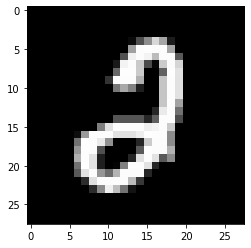

In [357]:
test_pic = x[np.random.randint(0,len(x))]
plt.imshow(test_pic, cmap="gray")

In [ ]:
784,[16,16,10]

(784,16)
(16,16)
(16,10)

In [451]:
class Dense:
    def __init__(self, layers, img_rows, img_cols):
        self.img_size = img_rows * img_cols
        self.num_layers = len(layers)
        self.layers = layers
        self.biases = [np.random.randn(y) for y in layers]
        self.weights = [np.random.randn(self.img_size,layers[0])]
        for i in range(self.num_layers-1):
            self.weights.append(np.random.randn(layers[i], layers[i+1]))


    def forward(self, inp):
        for b,w in zip(self.biases[:-1], self.weights[:-1]):
            inp = self.relu(np.dot(inp, w) + b)
        inp = self.sigmoid(np.dot(inp, self.weights[-1]) + self.biases[-1])
        return inp

    def train(self, data, labels, epochs=10, batch_size=100):
        self.data = data
        self.labels = labels
        self.train_error = []
        x_batch, y_batch =  self._get_batch(batch_size)

        # TODO feed each image and track avg error. Compute gradient and backprop. 

        for _ in range(epochs):
            x_batch_out = []
            for img in x_batch:
                #This could potentially be a large bottleneck that would see great perf. increase from GPU
                x_batch_out.append(self.forward(img))
            return (x_batch_out - y_batch) ** 2



    def _get_batch(self, batch_size):
        indices = np.random.randint(len(self.data), size=batch_size)
        return self.data[indices].reshape(batch_size, 784), self.labels[indices]




    def relu(self, inp):
        return np.maximum(inp,  0)

    def softmax(self, inp):
        return (np.e ** inp) / (sum(np.e ** inp))

    def sigmoid(self, inp):
        return 1.0/(1.0+np.exp(-inp))


In [452]:
temp = Dense([16,16,10], 28, 28)

In [453]:
temp.train(x, y, epochs=1, batch_size=10)

array([[9.99999879e-001, 0.00000000e+000, 9.99690327e-001,
        1.42942439e-010, 8.18619672e-026, 9.99999973e-001,
        2.25962713e-041, 1.78781387e-041, 2.88003502e-032,
        1.00000000e+000],
       [1.00000000e+000, 1.00000000e+000, 9.99998948e-001,
        1.04287263e-020, 3.32364063e-032, 1.29146799e-037,
        9.97996308e-001, 8.73903167e-110, 1.00000000e+000,
        9.99999368e-001],
       [1.00000000e+000, 1.00000000e+000, 2.27537649e-002,
        1.54131359e-014, 8.57609020e-048, 1.40796149e-019,
        7.86948163e-021, 2.78906923e-084, 1.00000000e+000,
        9.99999991e-001],
       [6.76400829e-020, 1.00000000e+000, 7.55310984e-001,
        3.59601194e-064, 1.09127537e-098, 4.54070280e-001,
        1.94069890e-132, 3.39963542e-127, 1.49350046e-081,
        1.00000000e+000],
       [1.00000000e+000, 1.00000000e+000, 2.68307829e-008,
        1.55134287e-053, 1.56041803e-063, 2.77645517e-004,
        4.76234963e-008, 6.16327642e-118, 8.28791211e-079,
        1.0

In [394]:
temp.forward(test_pic.reshape(784))

array([1.20015435e-43, 2.12096547e-57, 1.19924020e-14, 4.21521268e-20,
       7.33357979e-46, 1.00000000e+00, 9.97816600e-01, 1.00000000e+00,
       6.07105029e-05, 9.99997972e-01])

In [367]:
x[[1,2,3,4]]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])